### Exercise 3

#### Task 1

**Look at the page:**

https://timingai.com/finance/using-fourier-transforms-with-pytorch-for-data-analysis/

**and browse the slide set 3a.**

**Explain verbally how the Fourier transform can be used for time series data manipulation
in machine learning and especially with neural networks.
Explain verbally why it is not worth training and computing the frequency conversion
(Fourier transform) using NN’s.**


Fourier transform is a signal processing method, which can be used to represent time series signal as frequency domain. This allows several feature engineering methods to implement on signal, which can be further used to train naural network model. For example, model can detect speech from the audio data when using noise filtering.

It is not worth it to train and compute fourier transform using neural network due to computing time. Fourier transform can be efficiently computed using mathematical algorithms (fast fourier transform). Neural networks are more time consuming and accuracy may have major variance due to approximation and overfitting risk.

#### Task 2

**run the noise reduction to these two speech samples. Show spectrum clips 300-500
samples from the original and noise reduced outputs from both speech samples (four
images total). Copy the spectrogram parts from “spectrogram_sound.py” and modify it to
your needs.**

Two downloaded speech samples from https://github.com/microsoft/MS-SNSD/tree/master/noise_train are AirportAnnouncements.

Import libraries

In [1]:
import noisereduce as nr
import librosa
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import wavfile


Load and save data

In [2]:
rate, data = wavfile.read('AirportAnnouncements_1.wav')
rate_2, data_2 = wavfile.read('AirportAnnouncements_10.wav')

Run noise reduction using from https://github.com/timsainb/noisereduce

In [3]:
# perform noise reduction
reduced_noise = nr.reduce_noise(y=data, sr=rate)
reduced_noise_2 = nr.reduce_noise(y=data_2, sr=rate_2)
wavfile.write("mywav_reduced_noise.wav", rate, reduced_noise)

Plot audio signal and spectrum for original AirportAnnouncements_1.wav and noise reduced.

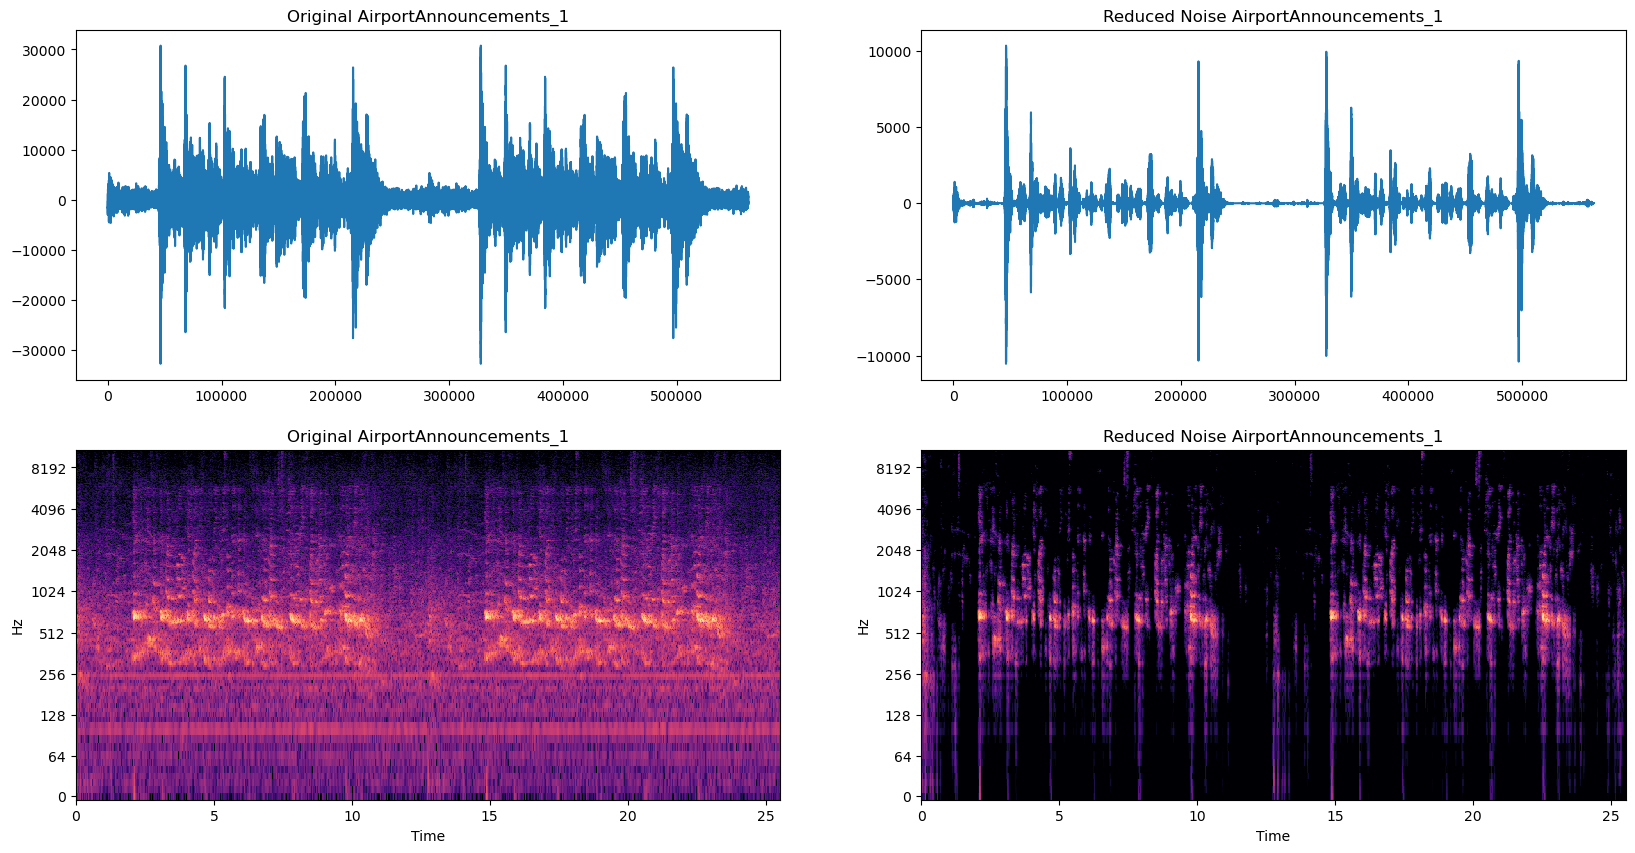

In [4]:
fix, ax = plt.subplots(2, 2, figsize=(20, 10))

ax[0, 0].plot(data)
ax[0, 0].set_title("Original AirportAnnouncements_1")
ax[0, 1].plot(reduced_noise)
ax[0, 1].set_title("Reduced Noise AirportAnnouncements_1")

# Convert audio data to floating-point
data_float = data.astype(np.float32)
reduced_noise_float = reduced_noise.astype(np.float32)

# plot spectrogram
D = librosa.amplitude_to_db(np.abs(librosa.stft(data_float)), ref=np.max)
D_reduced = librosa.amplitude_to_db(np.abs(librosa.stft(reduced_noise_float)), ref=np.max)

librosa.display.specshow(D, y_axis='log', x_axis='time', ax=ax[1, 0])
ax[1, 0].set_title("Original AirportAnnouncements_1")
librosa.display.specshow(D_reduced, y_axis='log', x_axis='time', ax=ax[1, 1])
ax[1, 1].set_title("Reduced Noise AirportAnnouncements_1")

plt.show()

Noise reduction seems to work well. From audio signal the difference is clear and reduced noise contains only the parts where there is speech. The spectrogram shows spectrum of frequencies over time. The original spectrogram is colourful and shows presence at 256 - 1024 Hz frequencies, which appear in orange/yellow colour. The noise can be considered as purple, which fulfills almost the entire spectrogram. On the reduced noise spectrogram, the there are clear visualizations regarding the frequencies over time. When analysing the speech from these types of noisy speech data, it is crucial to use noise reduction. 

These results are also inspected by listening the audio files both original and reduced. The difference can be heard very clearly as the reduced audio file does not contain background noises. However, the speech quality remains poor and in some parts it is difficult to understand the speech.

Plot audio signal and spectrum for original AirportAnnouncements_1.wav and noise reduced.

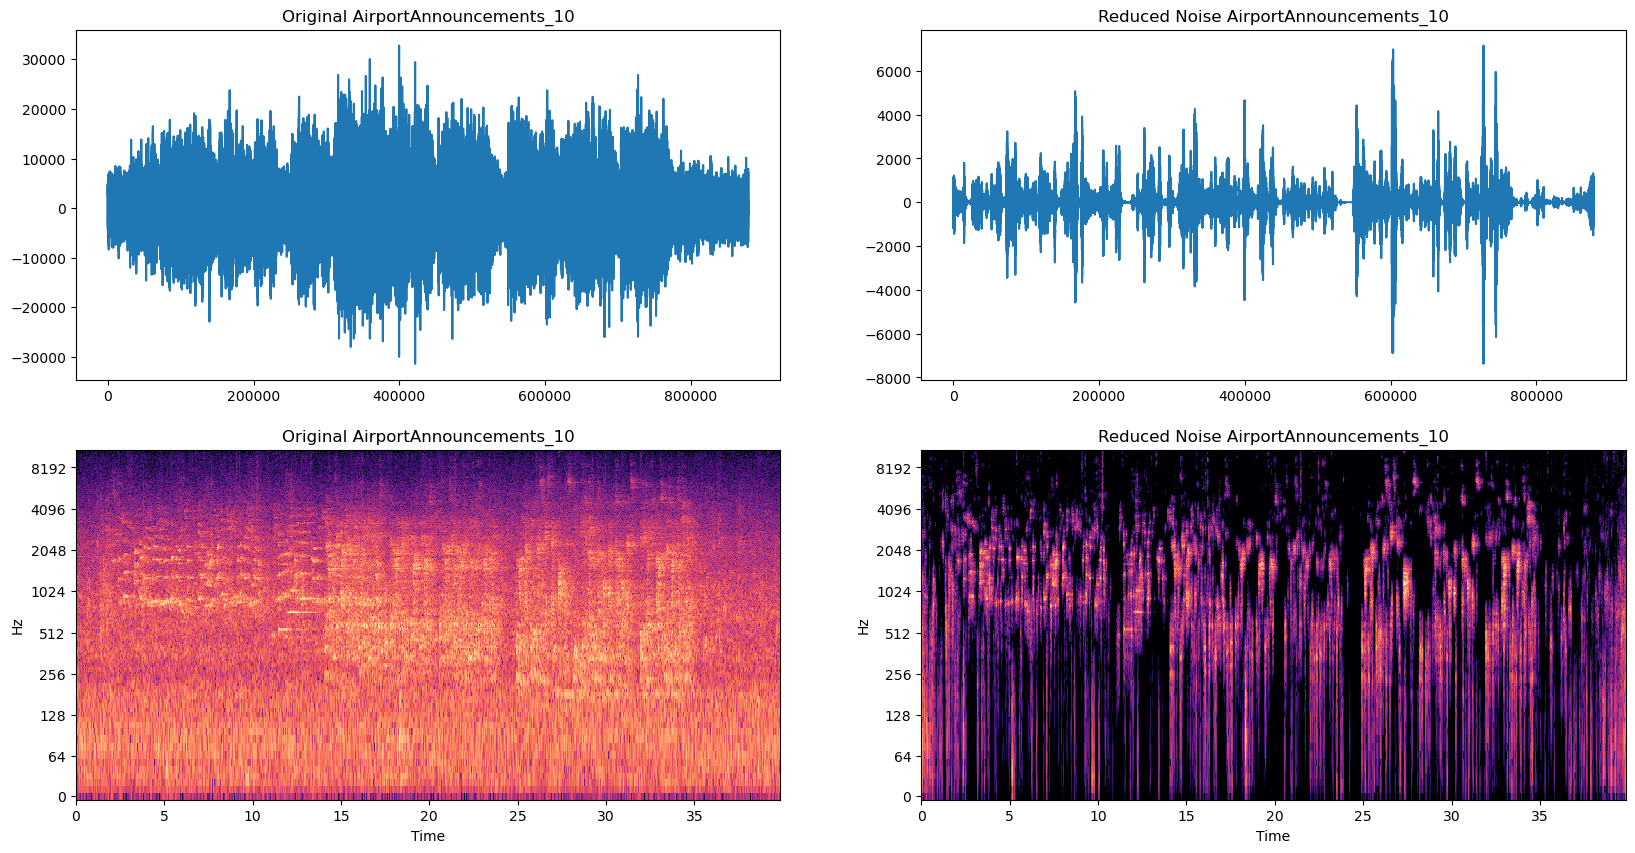

In [5]:
fix, ax = plt.subplots(2, 2, figsize=(20, 10))

ax[0, 0].plot(data_2)
ax[0, 0].set_title("Original AirportAnnouncements_10")
ax[0, 1].plot(reduced_noise_2)
ax[0, 1].set_title("Reduced Noise AirportAnnouncements_10")

# Convert audio data to floating-point
data_float_2 = data_2.astype(np.float32)
reduced_noise_float_2 = reduced_noise_2.astype(np.float32)

# plot spectrogram
D_2 = librosa.amplitude_to_db(np.abs(librosa.stft(data_float_2)), ref=np.max)
D_reduced_2 = librosa.amplitude_to_db(np.abs(librosa.stft(reduced_noise_float_2)), ref=np.max)

librosa.display.specshow(D_2, y_axis='log', x_axis='time', ax=ax[1, 0])
ax[1, 0].set_title("Original AirportAnnouncements_10")
librosa.display.specshow(D_reduced_2, y_axis='log', x_axis='time', ax=ax[1, 1])
ax[1, 1].set_title("Reduced Noise AirportAnnouncements_10")

plt.show()


This audio sample is more noisy as the audio signal is much more thicker and spectogram shows more presence at high frequencies, since the orange/yellow colour lines are up to 4096 Hz.The difference between audio signals is huge and noise reducer erases lot from the signal. Reduced spectrogram has cleaned most of high frequencies and preserved frequencies at 512 - 1024 Hz.

#### Task 4

**Choose one of the sets from the list and modify ‘Exercise_train_test.py’ code to classify
the selected dataset (train/test). Include confusion matrix in code.
Test the effect of standardization, by copying/mimicking the code from
‘Normalization_snippet.py’ with and without the standardization. Remember to make the
normalization to both train and test data.**

Selected dataset is called "Meat", which description is as follows:

Food spectrographs are used in chemometrics to classify food types, a task that has obvious applications in food safety and quality assurance. The classes are chicken, pork and turkey. Duplicate acquisitions aretaken from 60 independent samples. Obtained using Fourier transform infrared (FTIR) spectroscopy with attenuated total reflectance (ATR) sampling. As described in Mid-infrared spectroscopy and authenticity problems in selected meats: a feasibility study Al-Jowder O, Kemsley E K, Wilson R. H.(1997) Food Chemistry 59 195-20

Import libraries


In [35]:
import matplotlib.pyplot as plt
import seaborn
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split
from aeon.datasets import load_classification

Download the dataset and split into train/test sets

In [32]:
X, y, meta_data = load_classification("Meat", return_metadata=True)
# Convert X to 2D
X = X.reshape(X.shape[0], -1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

print(" Shape of X_train = ", X_train.shape)
print(" Shape of X_test = ", X_test.shape)
print(" Meta data = ", meta_data)

 Shape of X_train =  (84, 448)
 Shape of X_test =  (36, 448)
 Meta data =  {'problemname': 'meat', 'timestamps': False, 'missing': False, 'univariate': True, 'equallength': True, 'classlabel': True, 'targetlabel': False, 'class_values': ['1', '2', '3']}


Apply standardization, below code is mimicked from the Normalization_snippet.py. Sklearn StandardScaler converts each feature to have a mean of zero and std of 1. This prevents single data points from becoming dominant factor in the model. MinMaxScaler converts datapoints to be in range [0, 1]. Standardization is applied using both methods.

In [36]:
min_max_scale = MinMaxScaler()
standard_scale = StandardScaler()

X_train_standard = standard_scale.fit_transform(X_train)
X_test_standard = standard_scale.transform(X_test)

X_train_min_max = min_max_scale.fit_transform(X_train)
X_test_min_max = min_max_scale.transform(X_test)
    

Fit SVC model with rbf kernel. Compute accuracy results.

In [34]:
clf_original = SVC(kernel='rbf', random_state=0)
clf_min_max = SVC(kernel='rbf', random_state=0)
clf_standard = SVC(kernel='rbf', random_state=0)

# fit the models
clf_original.fit(X_train, y_train)
clf_min_max.fit(X_train_min_max, y_train)
clf_standard.fit(X_train_standard, y_train)

# predict
y_pred_original = clf_original.predict(X_test)
y_pred_min_max = clf_min_max.predict(X_test_min_max)
y_pred_standard = clf_standard.predict(X_test_standard)

# accuracy
accuracy_original = accuracy_score(y_test, y_pred_original)
accuracy_min_max = accuracy_score(y_test, y_pred_min_max)
accuracy_standard = accuracy_score(y_test, y_pred_standard)

print("Accuracy Original = ", accuracy_original)
print("Accuracy Min Max = ", accuracy_min_max)
print("Accuracy Standard = ", accuracy_standard)

Accuracy Original =  0.3055555555555556
Accuracy Min Max =  1.0
Accuracy Standard =  1.0


Accuracy results without normalization appears to be significantly lower, with result of 31 %. Using normalization, the accuracy is 100 %. This indicates that usage of normalization is important and could improve models accuracy. 

However, results again are dependent on the dataset. When switching dataset to previously used GunPoint, the results are following:

Accuracy Original =  0.75

Accuracy Min Max =  0.9166666666666666

Accuracy Standard =  0.9

Normalization seems to increase accuracy for GunPoint dataset. The difference is much lower but indicates the same analysis result as the Meat dataset.

However, at first I run the random forest classifier and normalization did not have any effect on the results. Tree-based models compute feature splits, which are not affected by the scale of the features. Normalization is important technique for neural networks and some the binary classifiers. Deep understanding of the model behaviour is crucial to decide whether normalization is necessary.

Plot confusion matrices for each result.

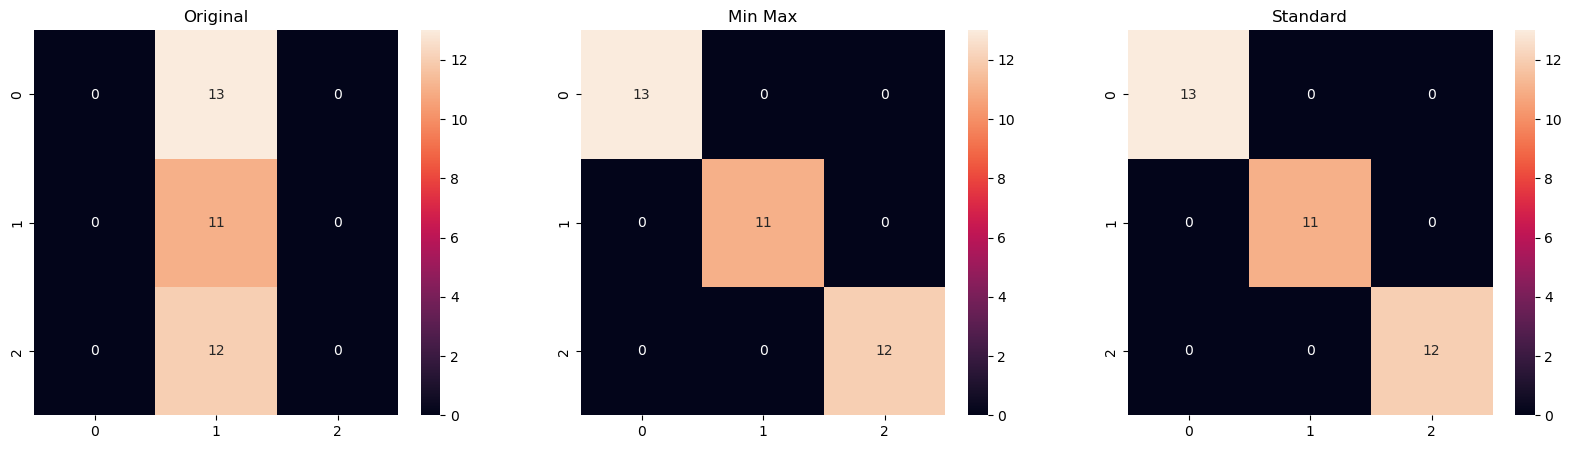

In [28]:
# confusion matrix
cm_original = confusion_matrix(y_test, y_pred_original)
cm_min_max = confusion_matrix(y_test, y_pred_min_max)
cm_standard = confusion_matrix(y_test, y_pred_standard)


fig, ax = plt.subplots(1, 3, figsize=(20, 5))
seaborn.heatmap(cm_original, annot=True, ax=ax[0])
ax[0].set_title("Original")
seaborn.heatmap(cm_min_max, annot=True, ax=ax[1])
ax[1].set_title("Min Max")
seaborn.heatmap(cm_standard, annot=True, ax=ax[2])
ax[2].set_title("Standard")
plt.show()

Non-scaled original data is not able to predict class 0 or 2 at all with zero correct predictions. All predictions are to class 1. Results with Min Max and Standard scaler are the same and each class is predicted correctly, which was expected with 100 % accuracy.

**Explain verbally: Why the X is usually normalized but not y in prediction?**

Y is not usually normalized as for classification problems as the y contains class labels. It is not ideal to normalize categorical binary outputs. Generally, the X normalization leads to better performance and prevents models to bias on dominant larger scale values.